In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
train= pd.read_csv("Data/train.csv")

In [4]:
train.shape

(95851, 8)

In [5]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


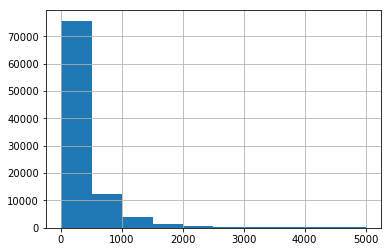

In [6]:
# Check the length of different text

size=train.comment_text.str.len()

size.hist()

In [7]:
np.sort(size)

array([   6,   12,   14, ..., 5000, 5000, 5000])

In [8]:
print (np.mean(size), np.min(size), np.max(size))

395.3418639346486 6 5000


In [9]:
print (sum(size<500), sum(size>500))

75435 20370


In [10]:
# Create a label "None" to know how many comments have no Labels

label_cols = ['toxic', 'severe_toxic', 'obscene','threat','insult','identity_hate']

# Adding 1 wherever rest all are 0 , otherwise 0
train['NoLabel']= 1- train[label_cols].max(axis=1)

In [11]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,NoLabel
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,1
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,1
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,1
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,1


In [12]:
train.describe()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,NoLabel
count,9.585100e+04,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000
mean,4.994359e+11,0.096368,0.010068,0.053301,0.003182,0.049713,0.008492,0.897862
std,2.890136e+11,0.295097,0.099832,0.224635,0.056320,0.217352,0.091762,0.302831
min,2.225664e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.473437e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.001297e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.501088e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999882e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Count the numbers of comments in each class
stats=train[label_cols+['NoLabel']].apply(pd.value_counts)
stats

,toxic,severe_toxic,obscene,threat,insult,identity_hate,NoLabel
0,86614,94886,90742,95546,91086,95037,9790
1,9237,965,5109,305,4765,814,86061


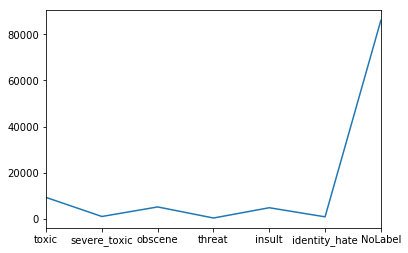

In [14]:
t=(stats.T[1])
t.plot()

In [15]:
# To check if there is any NULL comment
train['comment_text'].isnull().values.any()

False

## Building the model

#### Creating a bag of words and then use ngrams

In [16]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1', s).split()

In [17]:
temp=train['comment_text'][0]
temp

"Nonsense?  kiss off, geek. what I said is true.  I'll have your account terminated."

In [18]:
tokenize(temp)

['Nonsense',
 '?',
 'kiss',
 'off',
 ',',
 'geek',
 '.',
 'what',
 'I',
 'said',
 'is',
 'true',
 '.',
 'I',
 "'ll",
 'have',
 'your',
 'account',
 'terminated',
 '.']

In [19]:
# TF-IDF might be better than the binarized features, 
#since the length of the comments are varied in length

n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
                     min_df=3, max_df=0.9, strip_accents='unicode', 
                      use_idf=1, smooth_idf=1, sublinear_tf=1)

#sparse matrix with only a small number of non-zero elements
trn_term_doc = vec.fit_transform(train['comment_text'])

In [20]:
trn_term_doc

<95851x288577 sparse matrix of type '<class 'numpy.float64'>'
	with 9998991 stored elements in Compressed Sparse Row format>

In [21]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,NoLabel
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,1
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,1
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,1
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,1


In [22]:
train[train['toxic']==1].sum(0)

id                                                4613015895306002
comment_text     Nonsense?  kiss off, geek. what I said is true...
toxic                                                         9237
severe_toxic                                                   965
obscene                                                       4797
threat                                                         289
insult                                                        4445
identity_hate                                                  751
NoLabel                                                          0
dtype: object

In [23]:
(train['toxic']==1).sum()

9237

In [24]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    
    return (p+1)/((y==y_i).sum()+1)

In [25]:
x = trn_term_doc

In [ ]:
# fit a model for one class at a time

def get_mdl(y):
    
    y = y.values
    r = np.log(pr(1,y)/pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb,y),r

In [ ]:
preds = np.zeros((train.shape))

for i,j in enumerate(label_cols):
    print ("fit",j)
    
    m,r = get_mdl(train[j])
    
    preds[:,i] = m.predict_proba(x.multiply(r))[:,1]

fit toxic


In [ ]:
train.shape

Reference: https://www.kaggle.com/jhoward/nb-svm-strong-linear-baseline-eda-0-052-lb